In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# SUPERVISED LEARNING CAPSTONE PROJECT: TREE BASED FOCUS!
***
## OUR GOAL HERE IS TO PREDICT WHETHER A CUSTOMER WILL CHURN OR NOT.

In [ ]:
df = pd.read_csv('/content/Telco-Customer-Churn.csv')

In [ ]:
pd.set_option("display.max_columns", 500)
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

## CHECKING OUR DATA: CHECKING IT'S INFO AND ALSO FOR ANY NAN VALUES

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.describe().transpose()

count         mean          std    min       25%       50%  \
SeniorCitizen   7032.0     0.162400     0.368844   0.00    0.0000     0.000   
tenure          7032.0    32.421786    24.545260   1.00    9.0000    29.000   
MonthlyCharges  7032.0    64.798208    30.085974  18.25   35.5875    70.350   
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.4500  1397.475   

                      75%      max  
SeniorCitizen      0.0000     1.00  
tenure            55.0000    72.00  
MonthlyCharges    89.8625   118.75  
TotalCharges    3794.7375  8684.80

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='Churn', ylabel='count'>

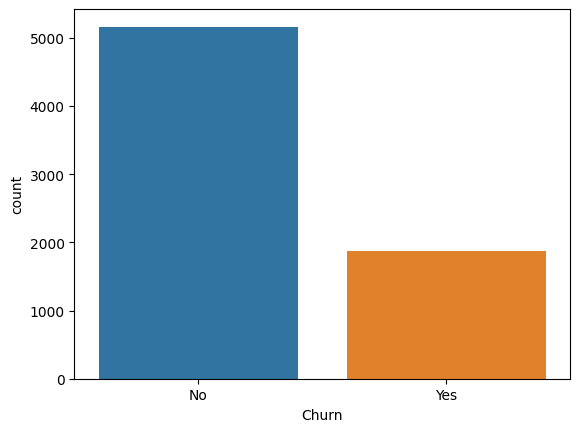

In [ ]:
sns.countplot(data=df,x='Churn')

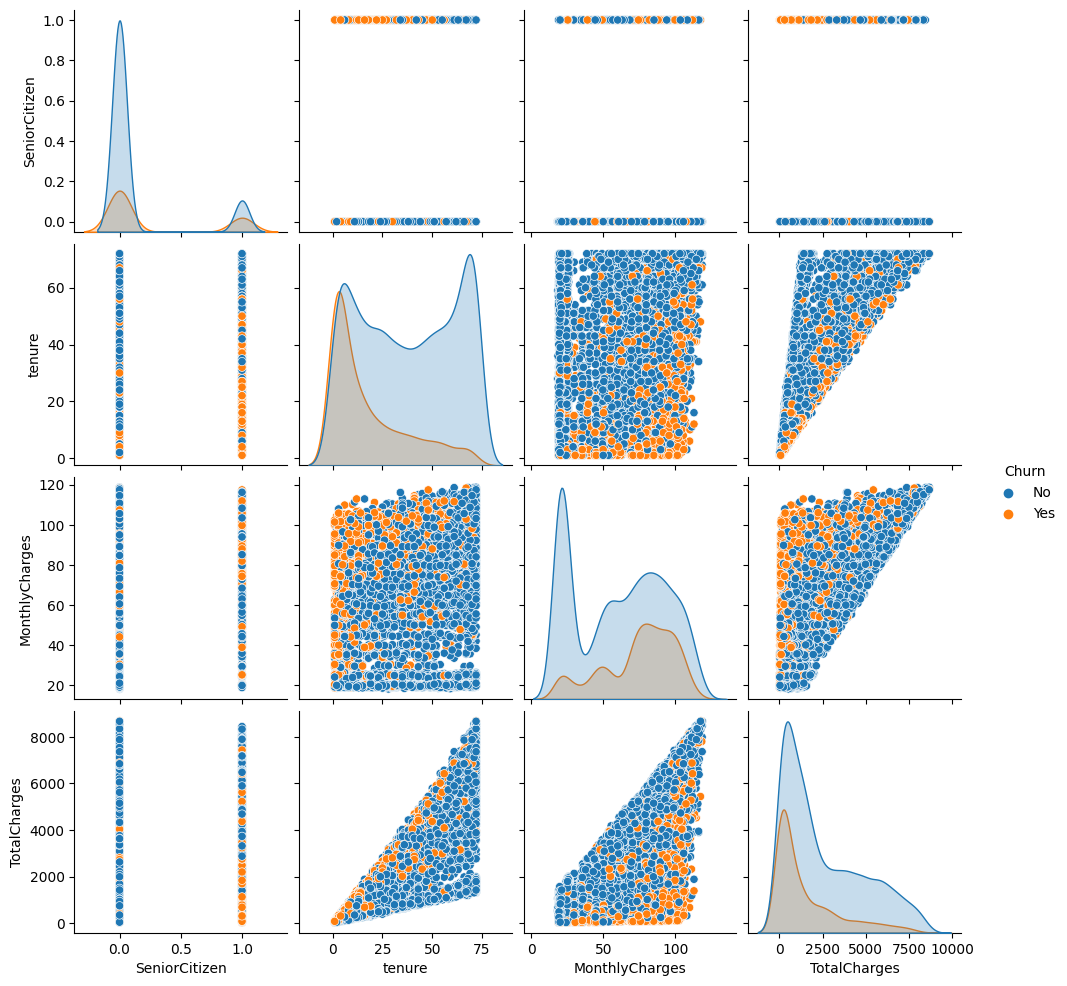

In [ ]:
sns.pairplot(data=df,hue='Churn')

In [ ]:
df.shape

(7032, 21)

In [ ]:
df['Churn'].value_counts() #it is imbalanced, but not too imbalanced.We can always check later on if the model doesn't perform well

No     5163
Yes    1869
Name: Churn, dtype: int64

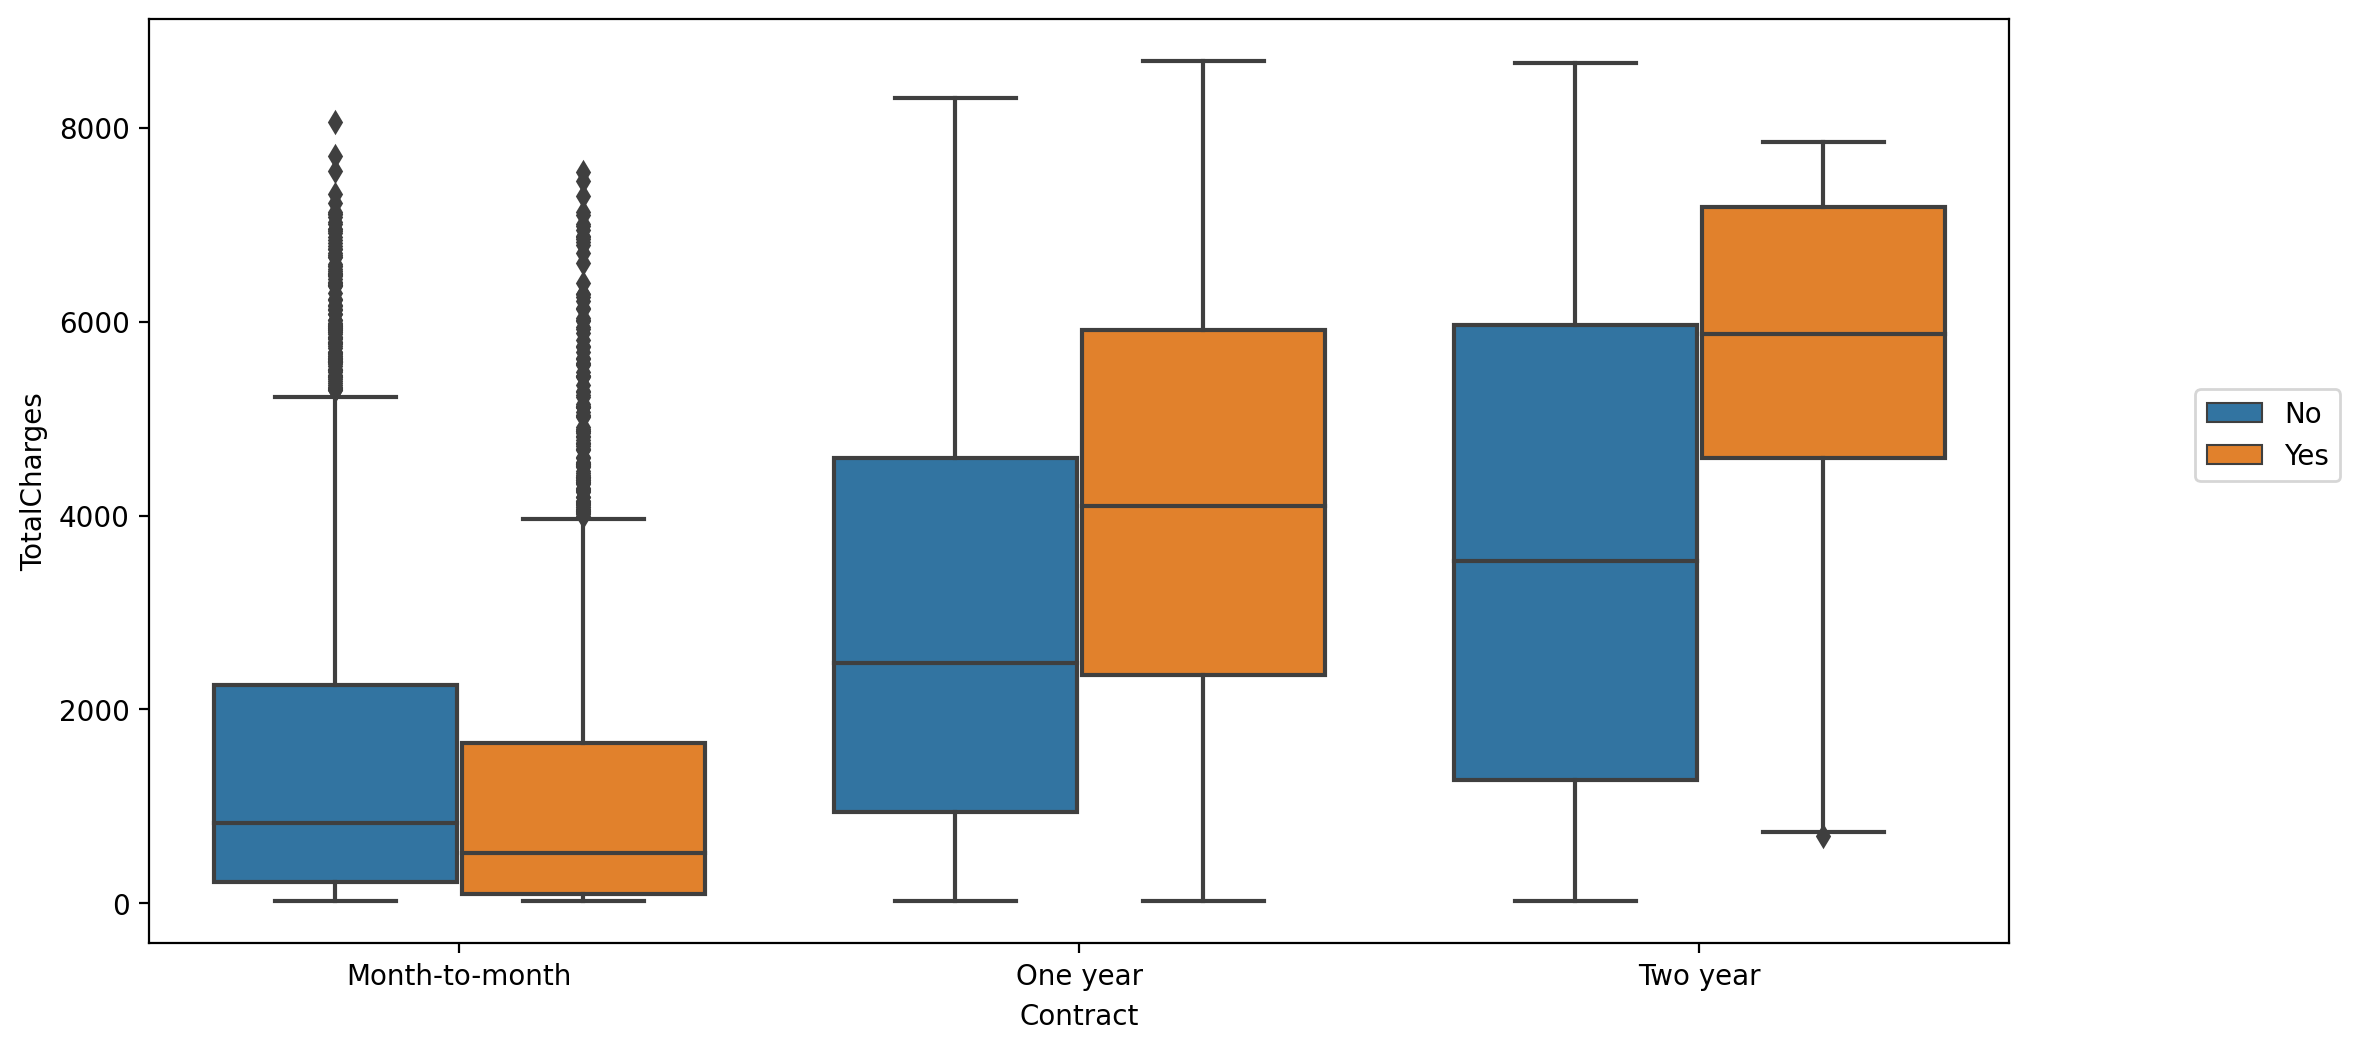

In [ ]:
plt.figure(figsize=(12,6),dpi=200)
sns.boxplot(data=df,x='Contract',y='TotalCharges',hue='Churn')
plt.legend(loc=(1.1,0.5))

## THIS SHOWS HOW THE PEOPLE WITH 1 AND 2 YEAR CONTRACTS WHO DID CHURN HAD SIGNIFICANTLY HIGHER TOTAL CHARGES THAN THE PEOPLE WHO DIDN'T CHURN.
**THEN THE COMPANY HAS TO THINK OF A SOLUTION TO TRY AND REDUCE THESE CHARGES TO TRY AND KEEP THE CUSTOMERS...SOMETHING LIKE DISCOUNT COUPONS OR LOYALTY DISCOUNT.**
***
# EXPLORATORY DATA ANALYSIS:
## NOW WE CONVERT THE CATEGORICAL COLUMNS INTO NUMBERS BY ONE HOT ENCODING(pd.get_dummies) and then PLOT a correlation graph
- **['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines','OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport','InternetService','StreamingTV','StreamingMovies','Contract','PaperlessBilling', 'PaymentMethod']**

- **Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID. AND WE ALSO ADD CHURN IN THIS TO GET 0's AND 1's**

In [ ]:
pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService',
                             'MultipleLines','OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport',
                             'InternetService','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
                             'PaymentMethod','Churn']])
#we dont use drop_first=True here just for the sake of the visualiztion, plus it didnt cause ay problems here.
#Other times we can drop it.

SeniorCitizen  gender_Female  gender_Male  Partner_No  Partner_Yes  \
0                 0              1            0           0            1   
1                 0              0            1           1            0   
2                 0              0            1           1            0   
3                 0              0            1           1            0   
4                 0              1            0           1            0   
...             ...            ...          ...         ...          ...   
7027              0              0            1           0            1   
7028              0              1            0           0            1   
7029              0              1            0           0            1   
7030              1              0            1           0            1   
7031              0              0            1           1            0   

      Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
0                 1               0                1                 0   
1                 1               0                0                 1   
2                 1               0                0                 1   
3                 1               0                1                 0   
4                 1               0                0                 1   
...             ...             ...              ...               ...   
7027              0               1                0                 1   
7028              0               1                0                 1   
7029              0               1                1                 0   
7030              1               0                0                 1   
7031              1               0                0                 1   

      MultipleLines_No  MultipleLines_No phone service  MultipleLines_Yes  \
0                    0                               1                  0   
1                    1                               0                  0   
2                    1                               0                  0   
3                    0                               1                  0   
4                    1                               0                  0   
...                ...                             ...                ...   
7027                 0                               0                  1   
7028                 0                               0                  1   
7029                 0                               1                  0   
7030                 0                               0                  1   
7031                 1                               0                  0   

      OnlineSecurity_No  OnlineSecurity_No internet service  \
0                     1                                   0   
1                     0                                   0   
2                     0                                   0   
3                     0                                   0   
4                     1                                   0   
...                 ...                                 ...   
7027                  0                                   0   
7028                  1                                   0   
7029                  0                                   0   
7030                  1                                   0   
7031                  0                                   0   

      OnlineSecurity_Yes  OnlineBackup_No  OnlineBackup_No internet service  \
0                      0                0                                 0   
1                      1                1                                 0   
2                      1                0                                 0   
3                      1                1                                 0   
4                      0                1                                 0   
...                  ...              ...       

In [ ]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService',
                             'MultipleLines','OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport',
                             'InternetService','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
                             'PaymentMethod','Churn']]).corr()

In [ ]:
corr_df

SeniorCitizen  gender_Female  \
SeniorCitizen                                 1.000000       0.001819   
gender_Female                                 0.001819       1.000000   
gender_Male                                  -0.001819      -1.000000   
Partner_No                                   -0.016957      -0.001379   
Partner_Yes                                   0.016957       0.001379   
Dependents_No                                 0.210550       0.010349   
Dependents_Yes                               -0.210550      -0.010349   
PhoneService_No                              -0.008392      -0.007515   
PhoneService_Yes                              0.008392       0.007515   
MultipleLines_No                             -0.136377      -0.004335   
MultipleLines_No phone service               -0.008392      -0.007515   
MultipleLines_Yes                             0.142996       0.008883   
OnlineSecurity_No                             0.185145      -0.010859   
OnlineSecurity_No internet service           -0.182519      -0.004745   
OnlineSecurity_Yes                           -0.038576       0.016328   
OnlineBackup_No                               0.087539      -0.008605   
OnlineBackup_No internet service             -0.182519      -0.004745   
OnlineBackup_Yes                              0.066663       0.013093   
DeviceProtection_No                           0.094403       0.003163   
DeviceProtection_No internet service         -0.182519      -0.004745   
DeviceProtection_Yes                          0.059514       0.000807   
TechSupport_No                                0.205254      -0.003815   
TechSupport_No internet service              -0.182519      -0.004745   
TechSupport_Yes                              -0.060577       0.008507   
InternetService_DSL                          -0.108276      -0.007584   
InternetService_Fiber optic                   0.254923       0.011189   
InternetService_No                           -0.182519      -0.004745   
StreamingTV_No                                0.048664      -0.003088   
StreamingTV_No internet service              -0.182519      -0.004745   
StreamingTV_Yes                               0.105445       0.007124   
StreamingMovies_No                            0.034196      -0.006078   
StreamingMovies_No internet service          -0.182519      -0.004745   
StreamingMovies_Yes                           0.119842       0.010105   
Contract_Month-to-month                       0.137752       0.003251   
Contract_One year                            -0.046491      -0.007755   
Contract_Two year                            -0.116205       0.003603   
PaperlessBilling_No                          -0.156258      -0.011902   
PaperlessBilling_Yes                          0.156258       0.011902   
PaymentMethod_Bank transfer (automatic)      -0.016235       0.015973   
PaymentMethod_Credit card (automatic)        -0.024359      -0.001632   
PaymentMethod_Electronic check                0.171322      -0.000844   
PaymentMethod_Mailed check                   -0.152987      -0.013199   
Churn_No                                     -0.150541      -0.008545   
Churn_Yes                                     0.150541       0.008545   

                                         gender_Male  Partner_No  Partner_Yes  \
SeniorCitizen                              -0.001819   -0.016957     0.016957   
gender_Female                              -1.000000   -0.001379     0.001379   
gender_Male                                 1.000000    0.001379    -0.001379   
Partner_No                                  0.001379    1.000000    -1.000000   
Partner_Yes                                -0.001379   -1.000000     1.000000   
Dependents_No                              -0.010349    0.452269    -0.452269   
Dependents_Yes                              0.010349   -0.452269     0.452269   
PhoneService_No                             0.007515    0.018397    -0.018397   
PhoneService_Yes          

In [ ]:
corr_yes_churn = corr_df['Churn_Yes'].sort_values(ascending=False).iloc[1:-1] #go from 1 to penultimate element while not considering the first element at index=0 and last element.

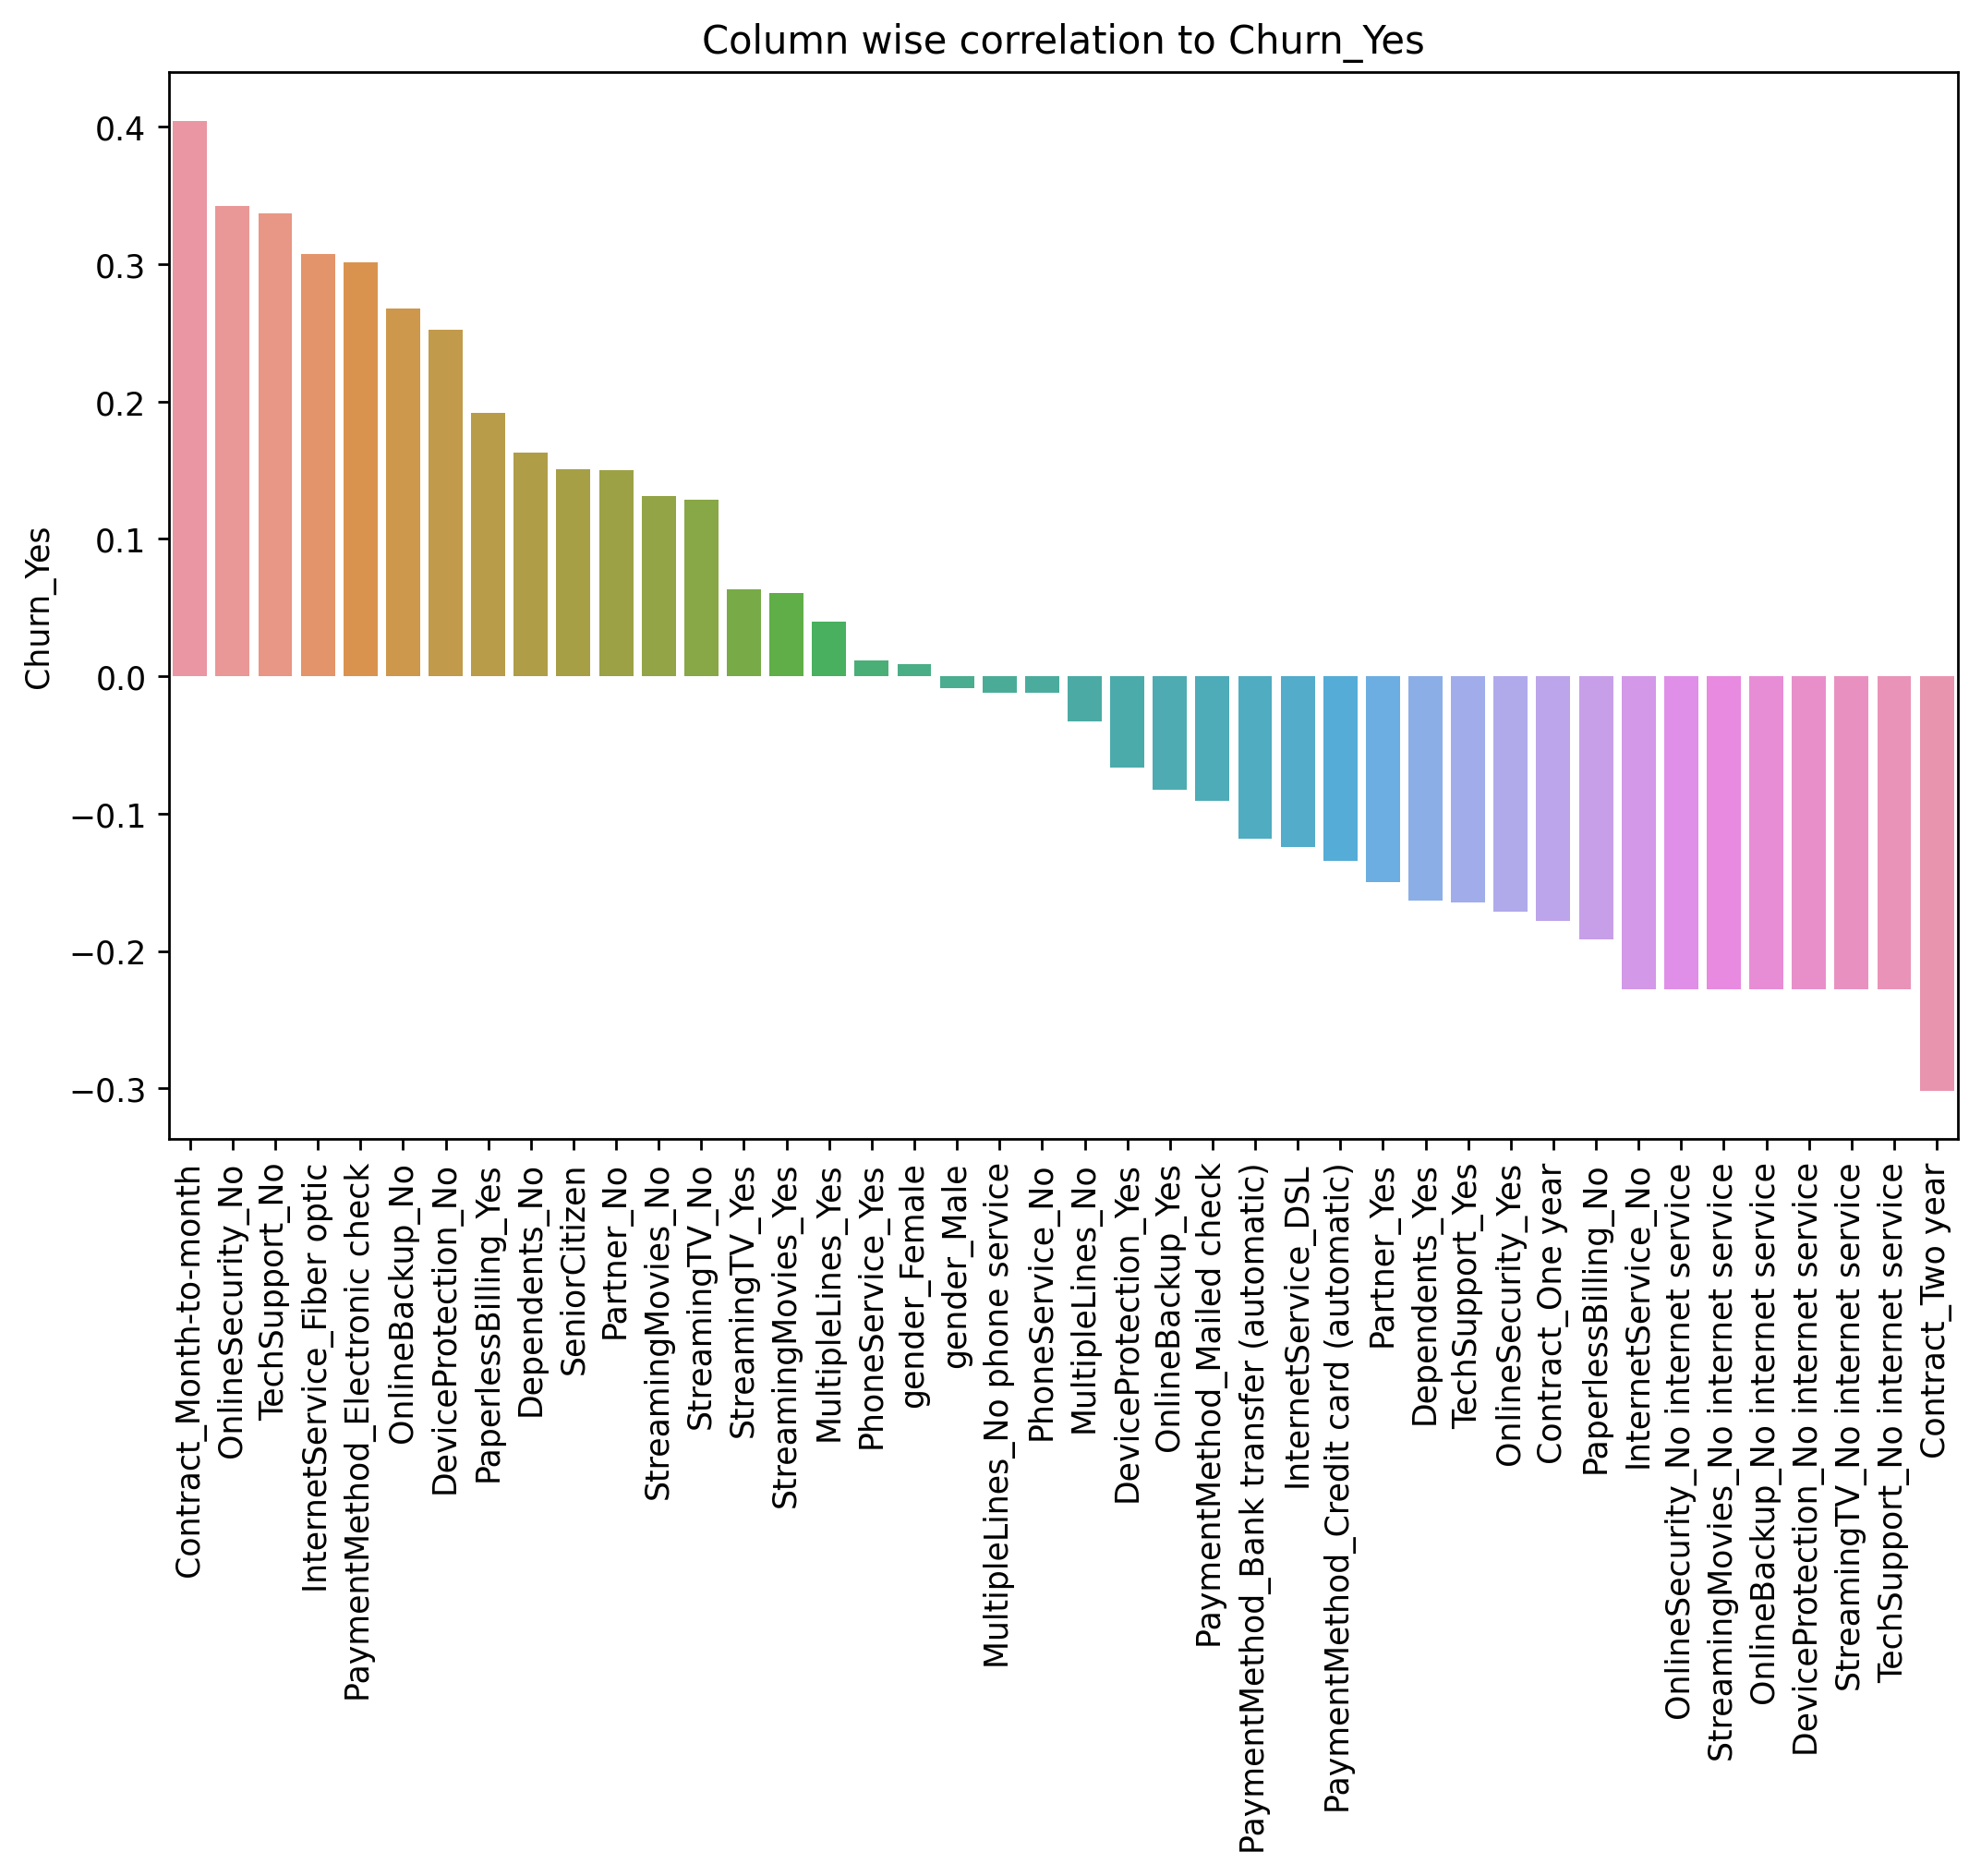

In [ ]:
plt.figure(figsize=(10,6),dpi=250)
sns.barplot(data=df,x=corr_yes_churn.index,y=corr_yes_churn)
plt.title('Column wise correlation to Churn_Yes')
plt.xticks(rotation=90);

## From the above graph we can clearly see how all the features having a +ve correlation are directly proportional to the customers churning while the features with -ve correlation are inversely proportional to the customer churn.
***
***
# CHURN ANALYSIS!!

In [ ]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [ ]:
df['tenure'].unique() #to see all the diff. tenure lengths

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39])

<Axes: xlabel='tenure', ylabel='Count'>

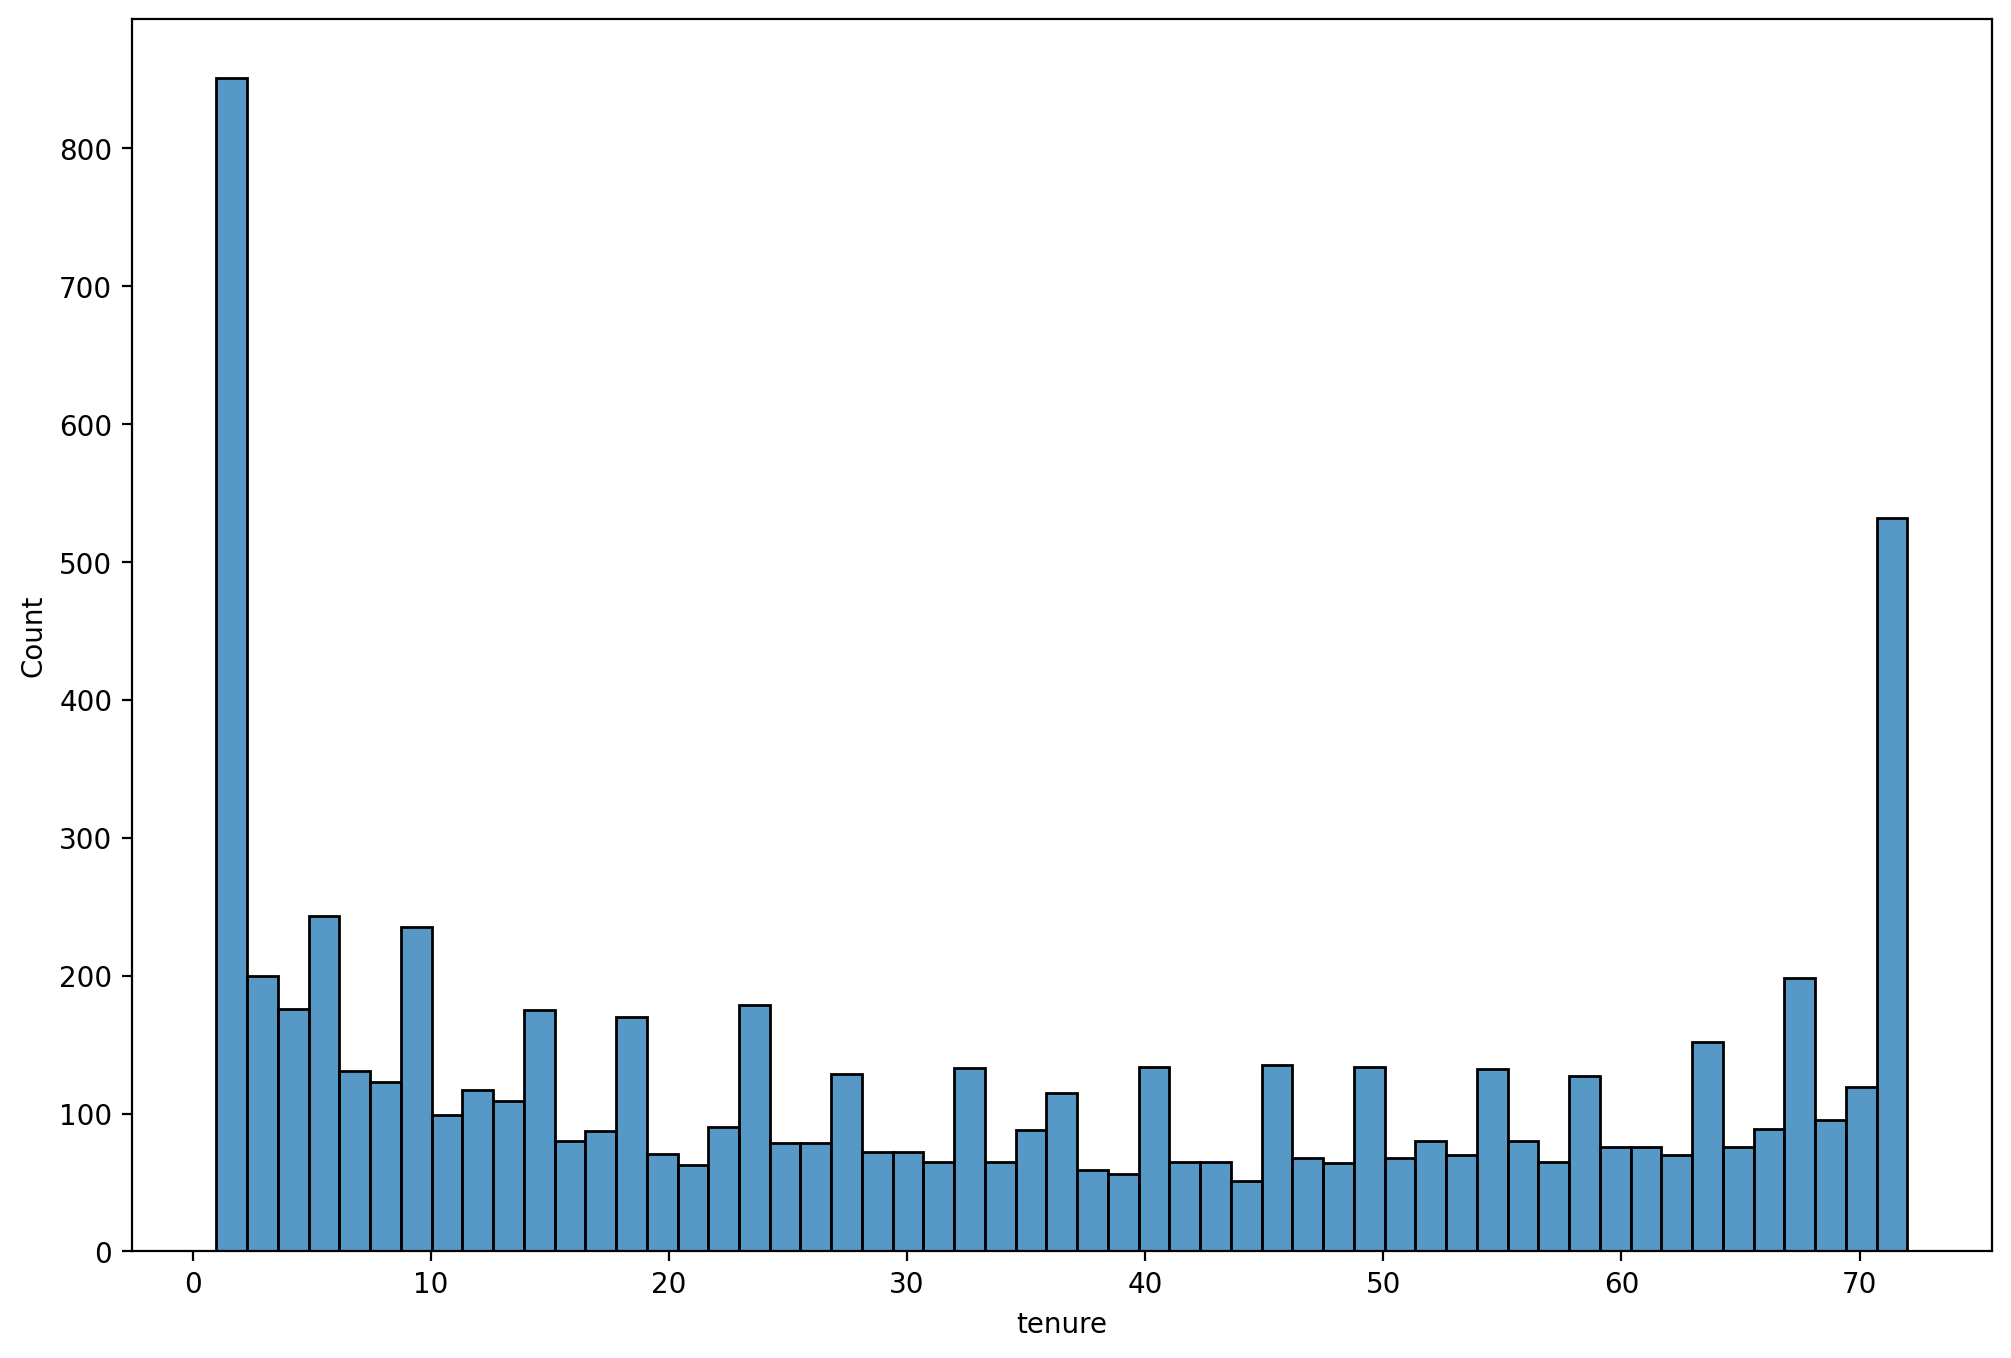

In [ ]:
#Visualising the tenure DISTRIBUTION/spreadness:
plt.figure(figsize=(12,8),dpi=200)
sns.histplot(data=df,x='tenure',bins=55)

<Figure size 2000x800 with 0 Axes>

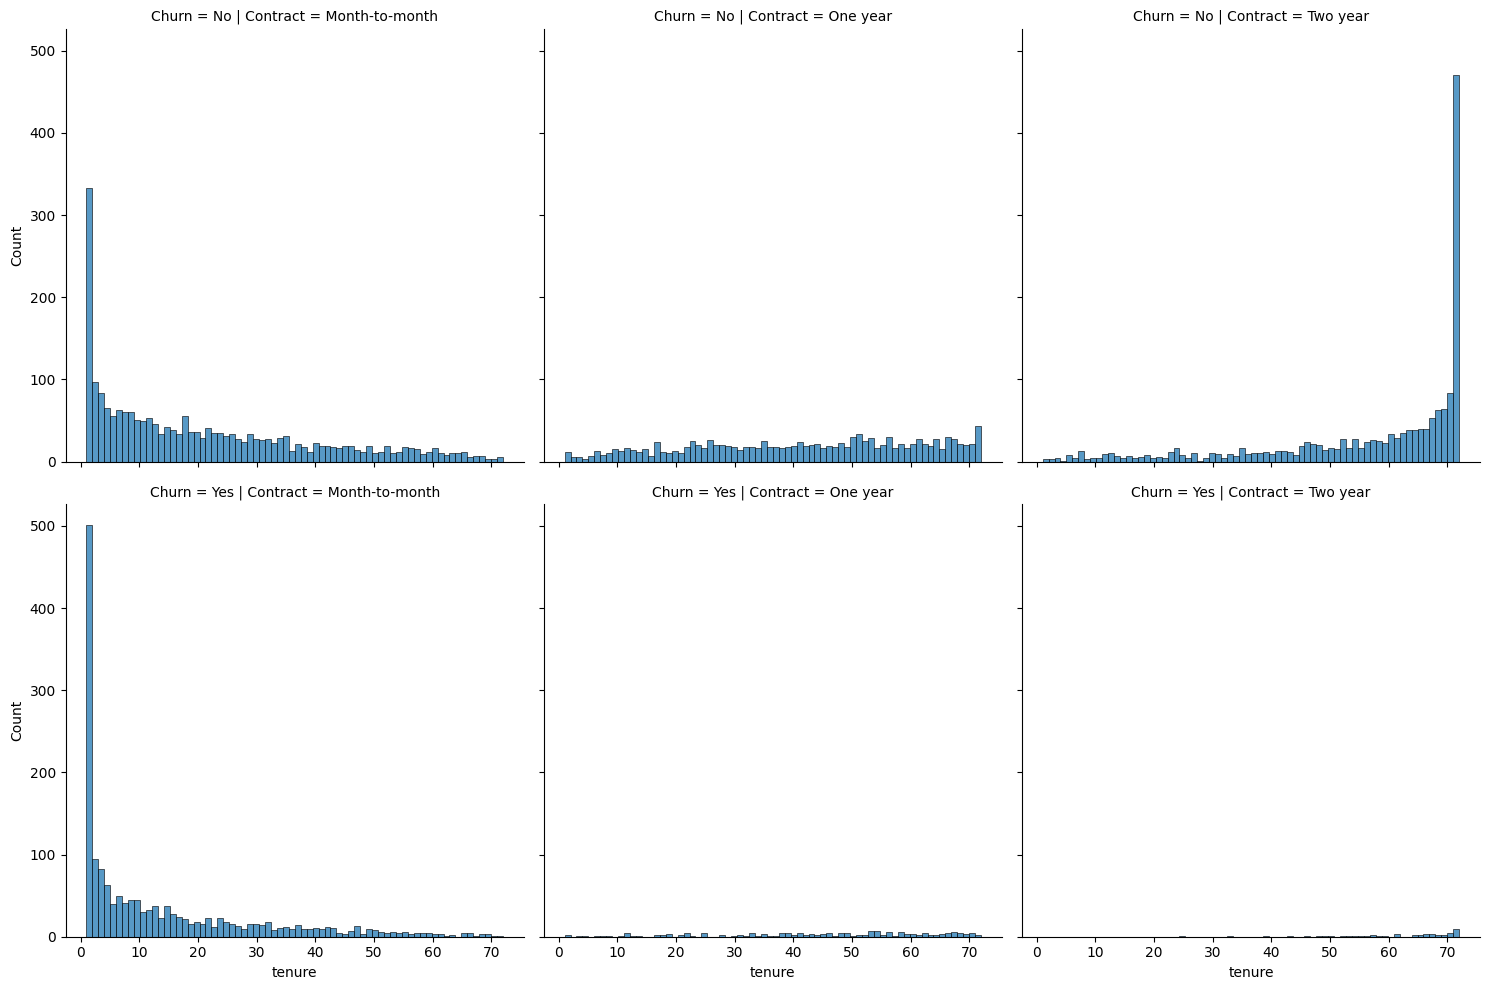

In [ ]:
plt.figure(figsize=(10,4),dpi=200)
sns.displot(data=df,x='tenure',col='Contract',row='Churn',bins=70)

### INFERENCE OF GRAPHS(Displot):
- **MONTH-TO-MONTH: The bottom left graph shows how most people with a month-to-month contract churn(leave) only after a few months.**
- **YEARLY: The people with one-year contracts stay pretty consistent.**
- **TWO-YEAR: We see that most people DO NOT churn after 2 years because the service might be a necessity to them and/or they are satisfied with the service.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

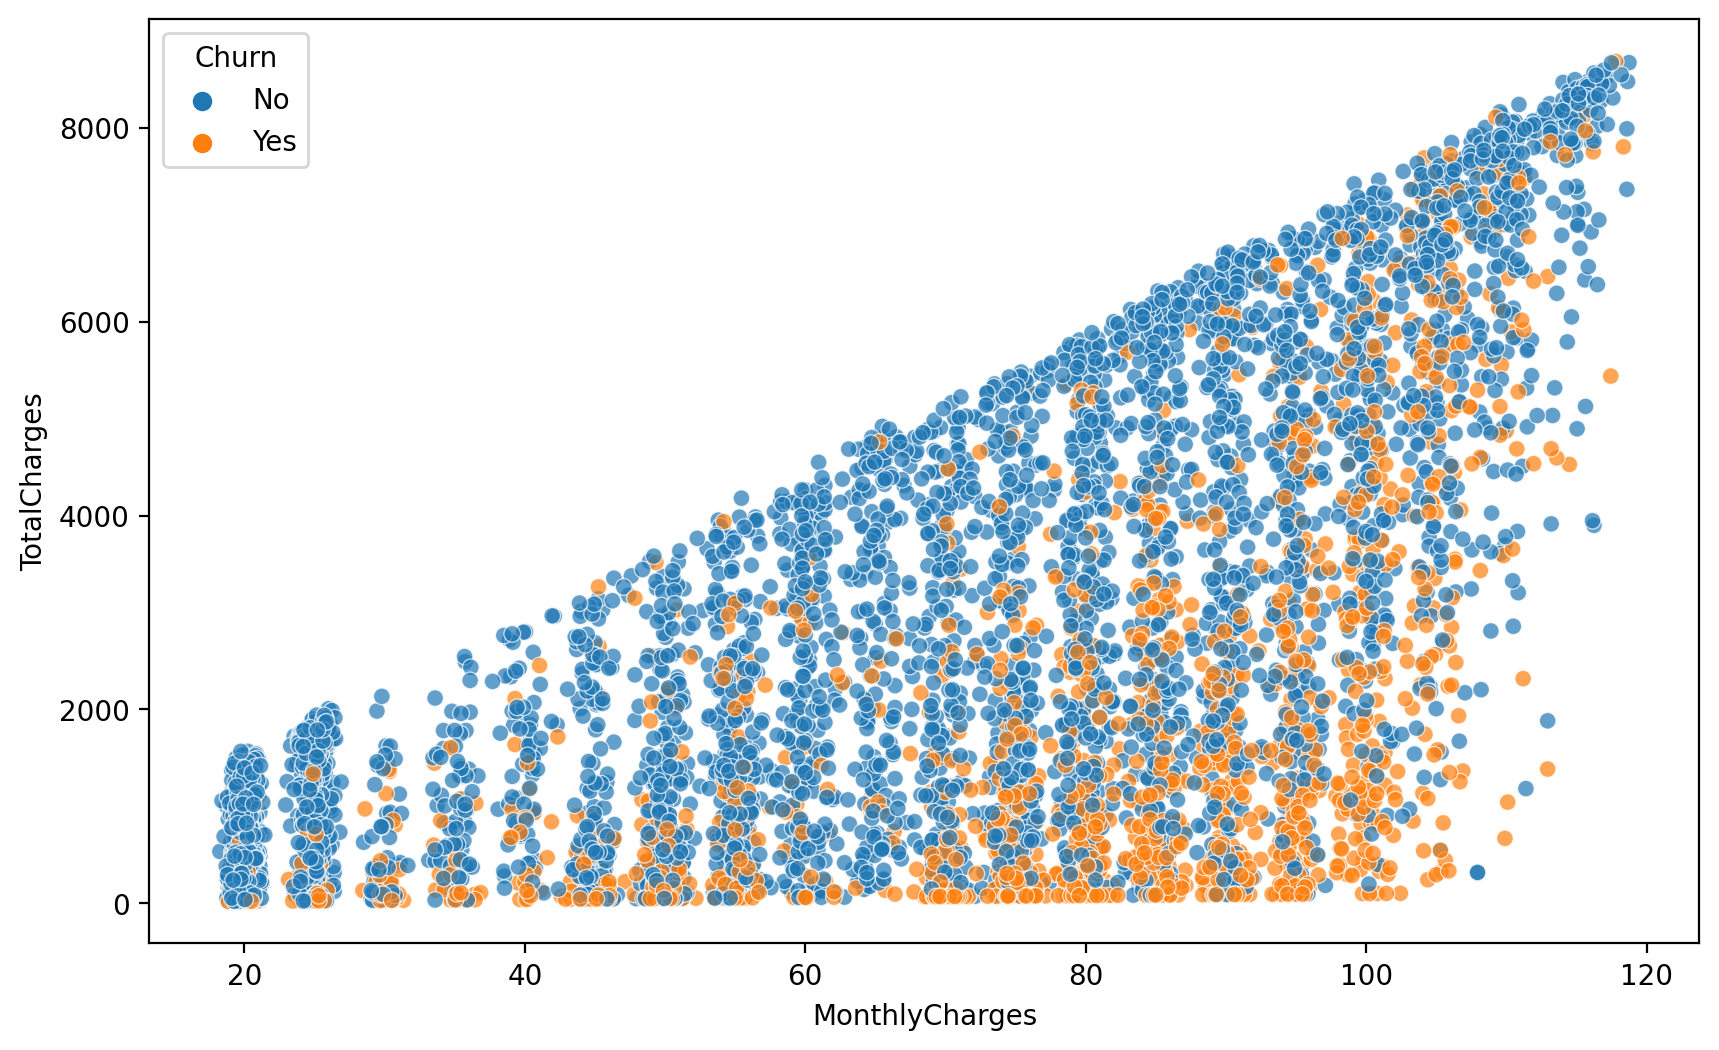

In [ ]:
# we make a scatterplot of monthly charges vs total charges:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x=df['MonthlyCharges'],y=df['TotalCharges'],hue='Churn',alpha=0.7)

### SCATTERPLOT INTERPRETATION:
- **Customers tend to churn way more when their monthly charges are high.**
- **The company is still not THAT worried because there are still many customers paying the same monthly charges whose total charges are WAY MORE and they are NOT churning.**

## COHORT ANALYSIS:
- **Cohort means grouping similar people/customers together.**
- **Here, we will treat every month from 1 to N as its own cohort and then calculate the churn percentage aka the % of people who churned.**

In [ ]:
df.groupby(['Churn','tenure']).count().transpose()
#shows us the number of people who churned/didn't churn w.r.t the no. of months of their tenure.

Churn              No                                                        \
tenure             1    2    3   4   5   6   7   8   9   10  11  12  13  14   
customerID        233  115  106  93  69  70  80  81  73  71  68  79  71  52   
gender            233  115  106  93  69  70  80  81  73  71  68  79  71  52   
SeniorCitizen     233  115  106  93  69  70  80  81  73  71  68  79  71  52   
Partner           233  115  106  93  69  70  80  81  73  71  68  79  71  52   
Dependents        233  115  106  93  69  70  80  81  73  71  68  79  71  52   
PhoneService      233  115  106  93  69  70  80  81  73  71  68  79  71  52   
MultipleLines     233  115  106  93  69  70  80  81  73  71  68  79  71  52   
InternetService   233  115  106  93  69  70  80  81  73  71  68  79  71  52   
OnlineSecurity    233  115  106  93  69  70  80  81  73  71  68  79  71  52   
OnlineBackup      233  115  106  93  69  70  80  81  73  71  68  79  71  52   
DeviceProtection  233  115  106  93  69  70  80  81  73  71  68  79  71  52   
TechSupport       233  115  106  93  69  70  80  81  73  71  68  79  71  52   
StreamingTV       233  115  106  93  69  70  80  81  73  71  68  79  71  52   
StreamingMovies   233  115  106  93  69  70  80  81  73  71  68  79  71  52   
Contract          233  115  106  93  69  70  80  81  73  71  68  79  71  52   
PaperlessBilling  233  115  106  93  69  70  80  81  73  71  68  79  71  52   
PaymentMethod     233  115  106  93  69  70  80  81  73  71  68  79  71  52   
MonthlyCharges    233  115  106  93  69  70  80  81  73  71  68  79  71  52   
TotalCharges      233  115  106  93  69  70  80  81  73  71  68  79  71  52   

Churn                                                                         \
tenure            15  16  17  18  19  20  21  22  23  24  25  26  27  28  29   
customerID        62  52  61  73  54  53  46  63  72  71  56  64  59  45  57   
gender            62  52  61  73  54  53  46  63  72  71  56  64  59  45  57   
SeniorCitizen     62  52  61  73  54  53  46  63  72  71  56  64  59  45  57   
Partner           62  52  61  73  54  53  46  63  72  71  56  64  59  45  57   
Dependents        62  52  61  73  54  53  46  63  72  71  56  64  59  45  57   
PhoneService      62  52  61  73  54  53  46  63  72  71  56  64  59  45  57   
MultipleLines     62  52  61  73  54  53  46  63  72  71  56  64  59  45  57   
InternetService   62  52  61  73  54  53  46  63  72  71  56  64  59  45  57   
OnlineSecurity    62  52  61  73  54  53  46  63  72  71  56  64  59  45  57   
OnlineBackup      62  52  61  73  54  53  46  63  72  71  56  64  59  45  57   
DeviceProtection  62  52  61  73  54  53  46  63  72  71  56  64  59  45  57   
TechSupport       62  52  61  73  54  53  46  63  72  71  56  64  59  45  57   
StreamingTV       62  52  61  73  54  53  46  63  72  71  56  64  59  45  57   
StreamingMovies   62  52  61  73  54  53  46  63  72  71  56  64  59  45  57   
Contract          62  52  61  73  54  53  46  63  72  71  56  64  59  45  57   
PaperlessBilling  62  52  61  73  54  53  46  63  72  71  56  64  59  45  57   
PaymentMethod     62  52  61  73  54  53  46  63  72  71  56  64  59  45  57   
MonthlyCharges    62  52  61  73  54  53  46  63  72  71  56  64  59  45  57   
TotalCharges      62  52  61  73  54  53  46  63  72  71  56  64  59  45  57   

Churn                                                                         \
tenure            30  31  32  33  34  35  36  37  38  39  40  41  42  43  44   
customerID        56  49  50  50  53  73  40  50  46  42  51  56  51  50  45   
gender            56  49  50  50  53  73  40  50  46  42  51  56  51  50  45   
SeniorCitizen     56  49  50  50  53  73  40  50  46  42  51  56  51  50  45   
Partner           56  49  50  50  53  73  40  50  46  42  51  56  51  50  45   
Dependents        56  49  50  50  53  73  40  50  46  42  51  56  51  50  45   
PhoneService      56  49  50  50  53  73  40  50  46  42  51  56  51  50  45   
MultipleLines     5

In [ ]:
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [ ]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']

In [ ]:
yes_churn.head()

tenure          1    2   3   4   5   6   7   8   9   10  11  12  13  14  15  \
customerID     380  123  94  83  64  40  51  42  46  45  31  38  38  24  37   
gender         380  123  94  83  64  40  51  42  46  45  31  38  38  24  37   
SeniorCitizen  380  123  94  83  64  40  51  42  46  45  31  38  38  24  37   
Partner        380  123  94  83  64  40  51  42  46  45  31  38  38  24  37   
Dependents     380  123  94  83  64  40  51  42  46  45  31  38  38  24  37   

tenure         16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
customerID     28  26  24  19  18  17  27  13  23  23  15  13  12  15  16  16   
gender         28  26  24  19  18  17  27  13  23  23  15  13  12  15  16  16   
SeniorCitizen  28  26  24  19  18  17  27  13  23  23  15  13  12  15  16  16   
Partner        28  26  24  19  18  17  27  13  23  23  15  13  12  15  16  16   
Dependents     28  26  24  19  18  17  27  13  23  23  15  13  12  15  16  16   

tenure         32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  \
customerID     19  14  12  15  10  15  13  14  13  14  14  15   6   6  12  14   
gender         19  14  12  15  10  15  13  14  13  14  14  15   6   6  12  14   
SeniorCitizen  19  14  12  15  10  15  13  14  13  14  14  15   6   6  12  14   
Partner        19  14  12  15  10  15  13  14  13  14  14  15   6   6  12  14   
Dependents     19  14  12  15  10  15  13  14  13  14  14  15   6   6  12  14   

tenure         48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  \
customerID      9  15  10   8   8  14  13   9  10   8  11   8   6   8   5   4   
gender          9  15  10   8   8  14  13   9  10   8  11   8   6   8   5   4   
SeniorCitizen   9  15  10   8   8  14  13   9  10   8  11   8   6   8   5   4   
Partner         9  15  10   8   8  14  13   9  10   8  11   8   6   8   5   4   
Dependents      9  15  10   8   8  14  13   9  10   8  11   8   6   8   5   4   

tenure         64  65  66  67  68  69  70  71  72  
customerID      4   9  13  10   9   8  11   6   6  
gender          4   9  13  10   9   8  11   6   6  
SeniorCitizen   4   9  13  10   9   8  11   6   6  
Partner         4   9  13  10   9   8  11   6   6  
Dependents      4   9  13  10   9   8  11   6   6

In [ ]:
churn_rate = 100*yes_churn / (no_churn+yes_churn)

In [ ]:
churn_rate #tenure for 1 month,churn rate is 61.99%

tenure                   1          2     3          4          5          6   \
customerID        61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
gender            61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
SeniorCitizen     61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
Partner           61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
Dependents        61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
PhoneService      61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
MultipleLines     61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
InternetService   61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
OnlineSecurity    61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
OnlineBackup      61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
DeviceProtection  61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
TechSupport       61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
StreamingTV       61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
StreamingMovies   61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
Contract          61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
PaperlessBilling  61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
PaymentMethod     61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
MonthlyCharges    61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
TotalCharges      61.990212  51.680672  47.0  47.159091  48.120301  36.363636   

tenure                   7          8          9          10         11  \
customerID        38.931298  34.146341  38.655462  38.793103  31.313131   
gender            38.931298  34.146341  38.655462  38.793103  31.313131   
SeniorCitizen     38.931298  34.146341  38.655462  38.793103  31.313131   
Partner           38.931298  34.146341  38.655462  38.793103  31.313131   
Dependents        38.931298  34.146341  38.655462  38.793103  31.313131   
PhoneService      38.931298  34.146341  38.655462  38.793103  31.313131   
MultipleLines     38.931298  34.146341  38.655462  38.793103  31.313131   
InternetService   38.931298  34.146341  38.655462  38.793103  31.313131   
OnlineSecurity    38.931298  34.146341  38.655462  38.793103  31.313131   
OnlineBackup      38.931298  34.146341  38.655462  38.793103  31.313131   
DeviceProtection  38.931298  34.146341  38.655462  38.793103  31.313131   
TechSupport       38.931298  34.146341  38.655462  38.793103  31.313131   
StreamingTV       38.931298  34.146341  38.655462  38.793103  31.313131   
StreamingMovies   38.931298  34.146341  38.655462  38.793103  31.313131   
Contract          38.931298  34.146341  38.655462  38.793103  31.313131   
PaperlessBilling  38.931298  34.146341  38.655462  38.793103  31.313131   
PaymentMethod     38.931298  34.146341  38.655462  38.793103  31.313131   
MonthlyCharges    38.931298  34.146341  38.655462  38.793103  31.313131   
TotalCharges      38.931298  34.146341  38.655462  38.793103  31.313131   

tenure                   12         13         14         15    16         17  \
customerID        32.478632  34.862385  31.578947  37.373737  35.0  29.885057   
gender            32.478632  34.862385  31.578947  37.373737  35.0  29.885057   
SeniorCitizen     32.478632  34.862385  31.578947  37.373737  35.0  29.885057   
Partner           32.478632  34.862385  31.578947  37.373737  35.0  29.885057   
Dependents        32.478632  34.862385  31.578947  37.373737  35.0  29.885057   
PhoneService      32.478632  34.862385  31.578947  37.373737  35.0  29.885057   
MultipleLines     32.478632  34.862385  31.578947  37.373737  35.0  29.885057   
InternetService   32.478632  34.862385  31.578947  37.373737  35.0  29.885057   
OnlineSecurity    32.478632  34.862385  31.578947  37.373737  35.0  29.885057   
OnlineBackup      32.478632  34.862385  31.578947  37.373737  35.0  

In [ ]:
#GIVES US CHURN RATE IN % W.R.T THE TENURE(NO. OF MONTHS)
churn_rate.transpose()['customerID']
# we only choose one column because all these values are repeating multiple times and we need them only once.

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

<Axes: xlabel='tenure'>

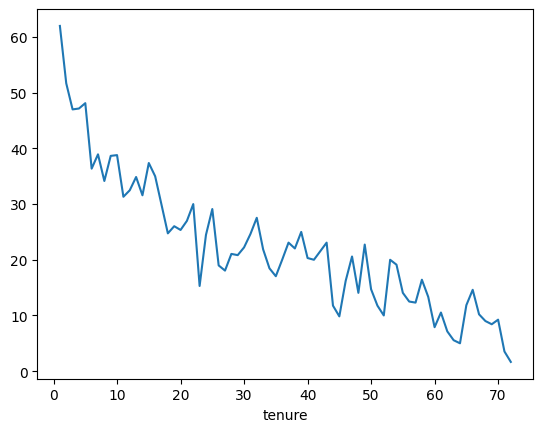

In [ ]:
churn_rate.transpose()['customerID'].plot()

### LINEPLOT INTERPRETATION:
- **Tells us how people with shorter contracts churn WAY MORE than people with longer contracts, which is understandable because the longer you are subscribed to a certain service, the less likely you are oing to change it.**
***
### BROADER COHORT GROUPS:
- **Generally companies won't make cohorts based on single values aka for every single tenure value; they make bigger groups of customers and cluster them per se.**

- **'0-12 MONTHS' ; '12-24 MONTHS' ; '24-28 MONTHS' ; 'OVER 48 MONTHS' .**

In [ ]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [ ]:
df['tenure'].apply(cohort)

0          0-12 Months
1         24-48 Months
2          0-12 Months
3         24-48 Months
4          0-12 Months
             ...      
7027      12-24 Months
7028    Over 48 Months
7029       0-12 Months
7030       0-12 Months
7031    Over 48 Months
Name: tenure, Length: 7032, dtype: object

In [ ]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [ ]:
df[['tenure','Tenure Cohort']]

tenure   Tenure Cohort
0          1     0-12 Months
1         34    24-48 Months
2          2     0-12 Months
3         45    24-48 Months
4          2     0-12 Months
...      ...             ...
7027      24    12-24 Months
7028      72  Over 48 Months
7029      11     0-12 Months
7030       4     0-12 Months
7031      66  Over 48 Months

[7032 rows x 2 columns]

### Plotting ANOTHER scatterplot:

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

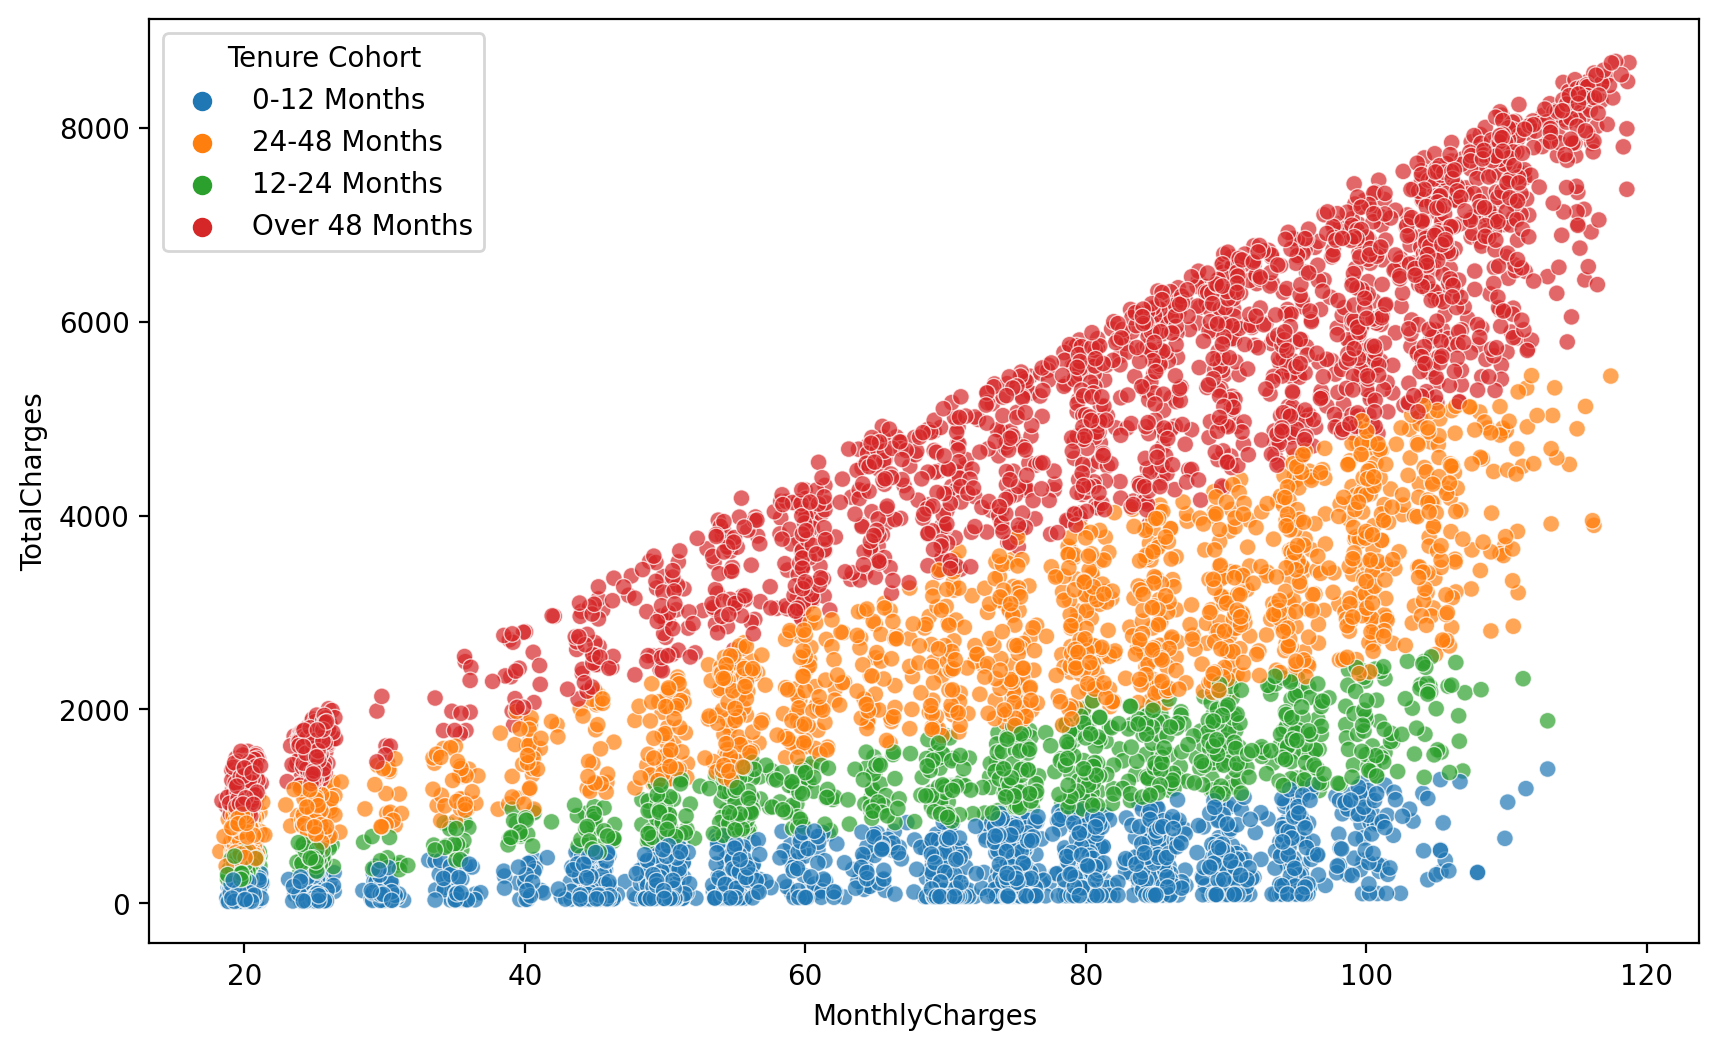

In [ ]:
#same plot as above; we just change the hue from churn to tenure cohort
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x=df['MonthlyCharges'],y=df['TotalCharges'],hue='Tenure Cohort',alpha=0.7)

- **This shows how the longer  customer stays, the HIGHER the total charges which is more profitable for the company.**

<Axes: xlabel='Tenure Cohort', ylabel='count'>

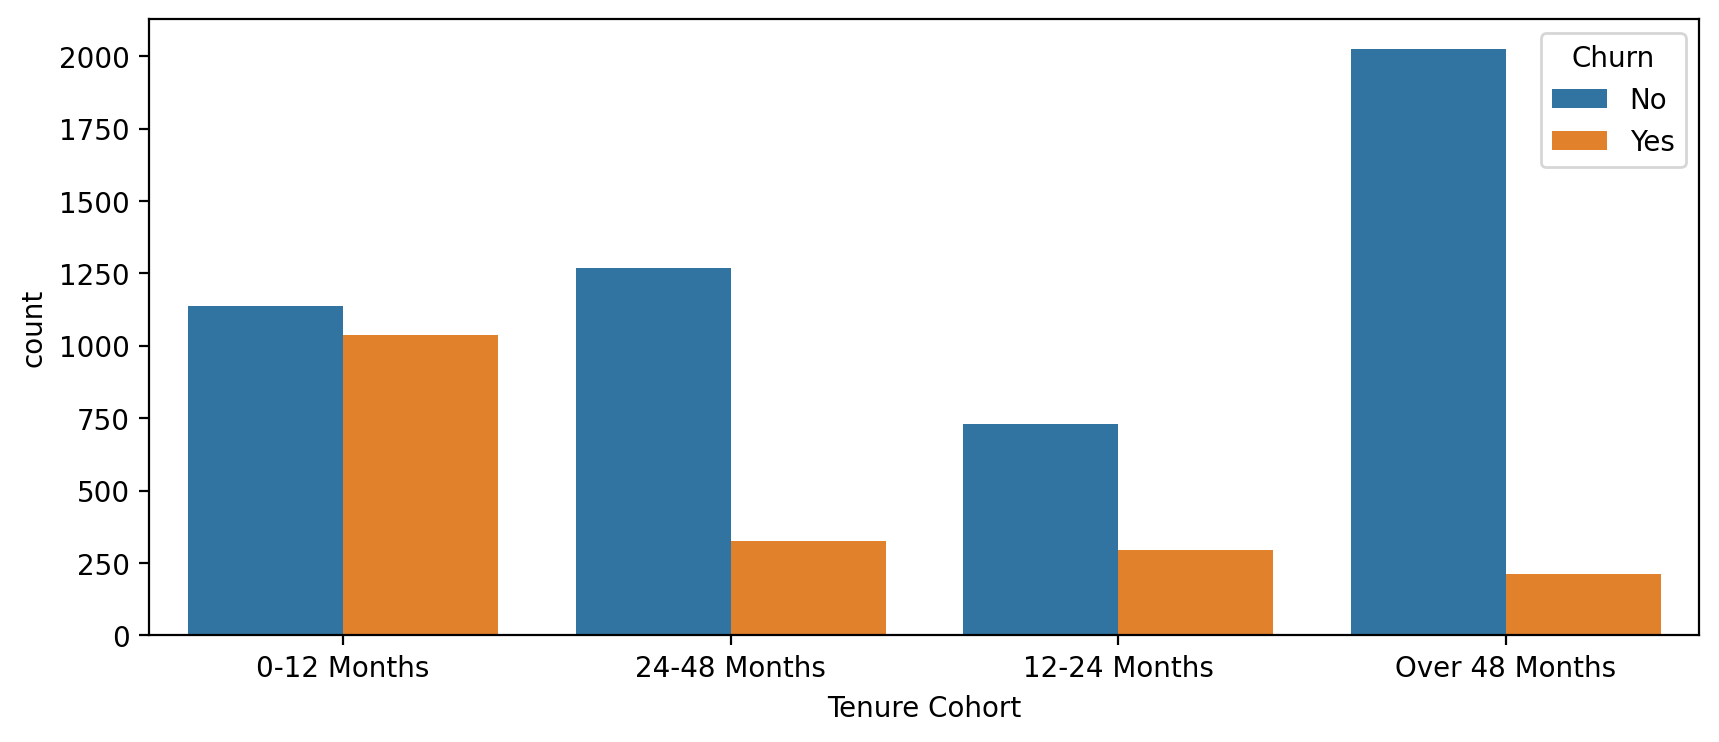

In [ ]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')

- **SHOWS HOW OVER TIME, THE CHURN RATE DRAMATICALLY DECREASES, SO THE MAIN GOAL OF THE COMPANY SHOULD BE TO FIND WAYS TO MAKE THE CUSTOMERS WITH SHORTER CONTRACTS STAY LONGER AKA NOT CHURN EARLY.**

<Figure size 1280x960 with 0 Axes>

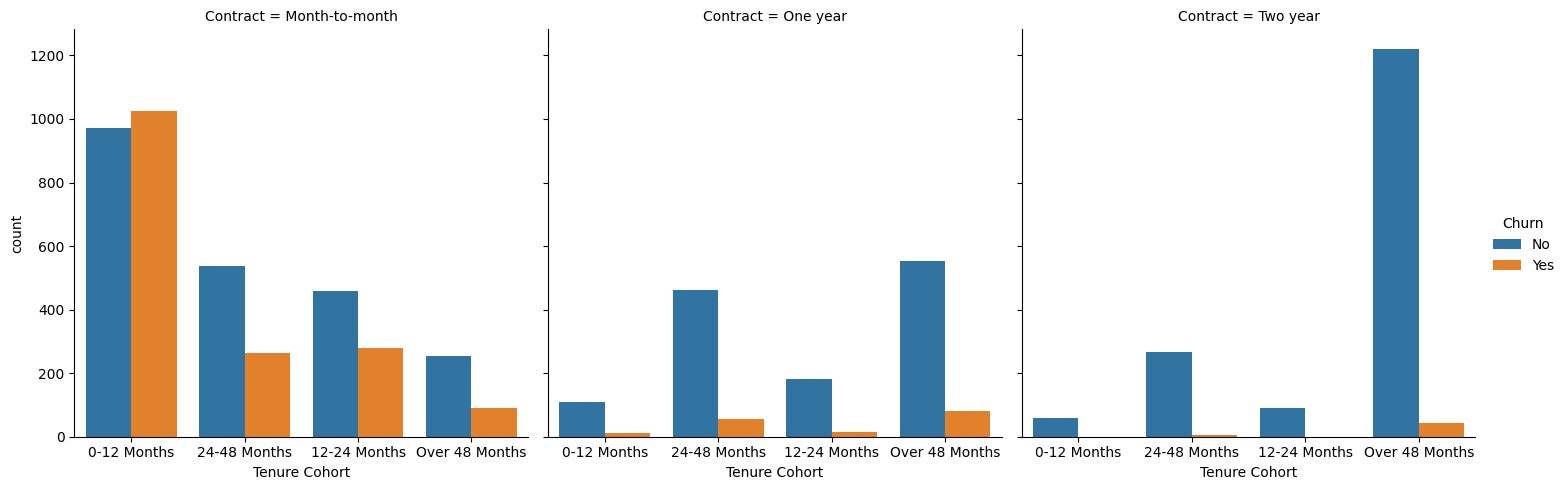

In [ ]:
plt.figure(dpi=200)
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',kind='count',col='Contract');

### CATPLOT INFERENCE:
- **Shows how people with month to month contract will ALWAYS be MORE LIKELY to churn than people with long term contracts.**
- **People who directly sign up for a long term contract are less likely to churn regardless of how long they stay.**
***

***
# PREDICTIVE MODELING: TREE BASED MODELS
- **We will test out 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting.!**
- **We can test out any other supervised learning algorithm as well if we want; like SVM and LogisticRegression**
***
## SINGLE DECISION TREE:

In [ ]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn Tenure Cohort  
0    No   0-12 Months  
1    No  24-48 Months  
2   Yes   0-12 Months  
3    No  24-48 Months  
4   Yes   0-12 Months

### customer ID isnt relevant here as we already have index column to uniquely identify the values, so we dont include customerID in the features list

In [ ]:
X = df.drop(['customerID','Churn'],axis=1)
y = df['Churn']

- **Now we need to turn all these categorical columns into numbers so we use pd.get_dummies:**

In [ ]:
X = pd.get_dummies(X,drop_first=True)

In [ ]:
X

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0                 0       1           29.85         29.85            0   
1                 0      34           56.95       1889.50            1   
2                 0       2           53.85        108.15            1   
3                 0      45           42.30       1840.75            1   
4                 0       2           70.70        151.65            0   
...             ...     ...             ...           ...          ...   
7027              0      24           84.80       1990.50            1   
7028              0      72          103.20       7362.90            0   
7029              0      11           29.60        346.45            0   
7030              1       4           74.40        306.60            1   
7031              0      66          105.65       6844.50            1   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0               1               0                 0   
1               0               0                 1   
2               0               0                 1   
3               0               0                 0   
4               0               0                 1   
...           ...             ...               ...   
7027            1               1                 1   
7028            1               1                 1   
7029            1               1                 0   
7030            1               0                 1   
7031            0               0                 1   

      MultipleLines_No phone service  MultipleLines_Yes  \
0                                  1                  0   
1                                  0                  0   
2                                  0                  0   
3                                  1                  0   
4                                  0                  0   
...                              ...                ...   
7027                               0                  1   
7028                               0                  1   
7029                               1                  0   
7030                               0                  1   
7031                               0                  0   

      InternetService_Fiber optic  InternetService_No  \
0                               0                   0   
1                               0                   0   
2                               0                   0   
3                               0                   0   
4                               1                   0   
...                           ...                 ...   
7027                            0                   0   
7028                            1                   0   
7029                            0                   0   
7030                            1                   0   
7031                            1                   0   

      OnlineSecurity_No internet service  OnlineSecurity_Yes  \
0                                      0                   0   
1                                      0                   1   
2                                      0                   1   
3                                      0                   1   
4                                      0                   0   
...                                  ...                 ...   
7027                                   0                   1   
7028                                   0                   0   
7029                                   0                   1   
7030                                   0                   0   
7031                                   0                   1   

      OnlineBackup_No internet service  OnlineBackup_Yes  \
0                                    0                 1   
1                                    0                 0   
2                                    0                 1   
3                                    0               

- **Now we perform train test split and we will hold out 10% of the data for testing and random_state of 101.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(max_depth=6) #if we want the best parameters, we cn always perform a GridSearch for them.

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report

In [ ]:
preds = model.predict(X_test)

In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



## CONCLUSION:
- ### It is performing way better on 'No Churn' data, which is understandable because we saw at the start that the data wasn't quite well balanced and it has way more data for no churn.

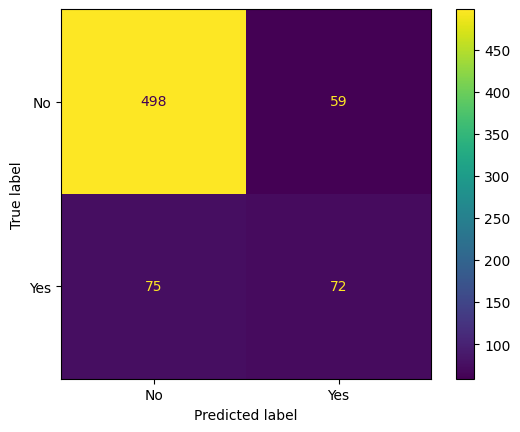

In [ ]:
cm = confusion_matrix(y_test, preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()

### **This tells us how we will have 75 wrong predictions in terms of False Negatives(It is actually 'Yes' but our model predicts 'No')**
- **We will also get 59 false positives(It is actually 'No' but our model predicts 'Yes')**
- **We have to mainly take care of these 75 wrongly classified people because they were going to churn and the company won't be prepared to try and keep them. We should instead give them extra incentives to stay like discounts, coupons etc etc.**

In [ ]:
imp_features = pd.DataFrame(data=model.feature_importances_,
                            index=X.columns, columns=['Feature Importance'])

In [ ]:
imp_features = imp_features.sort_values('Feature Importance',ascending=False)

In [ ]:
imp_features = imp_features[imp_features['Feature Importance']>0]

In [ ]:
imp_features

Feature Importance
tenure                                          0.423914
InternetService_Fiber optic                     0.314060
TotalCharges                                    0.063506
MonthlyCharges                                  0.044922
PaymentMethod_Electronic check                  0.034436
Contract_Two year                               0.027065
DeviceProtection_No internet service            0.026290
SeniorCitizen                                   0.012680
MultipleLines_Yes                               0.012432
Contract_One year                               0.010021
OnlineSecurity_Yes                              0.008376
TechSupport_Yes                                 0.007868
MultipleLines_No phone service                  0.006962
OnlineBackup_Yes                                0.005341
gender_Male                                     0.001237
PhoneService_Yes                                0.000890

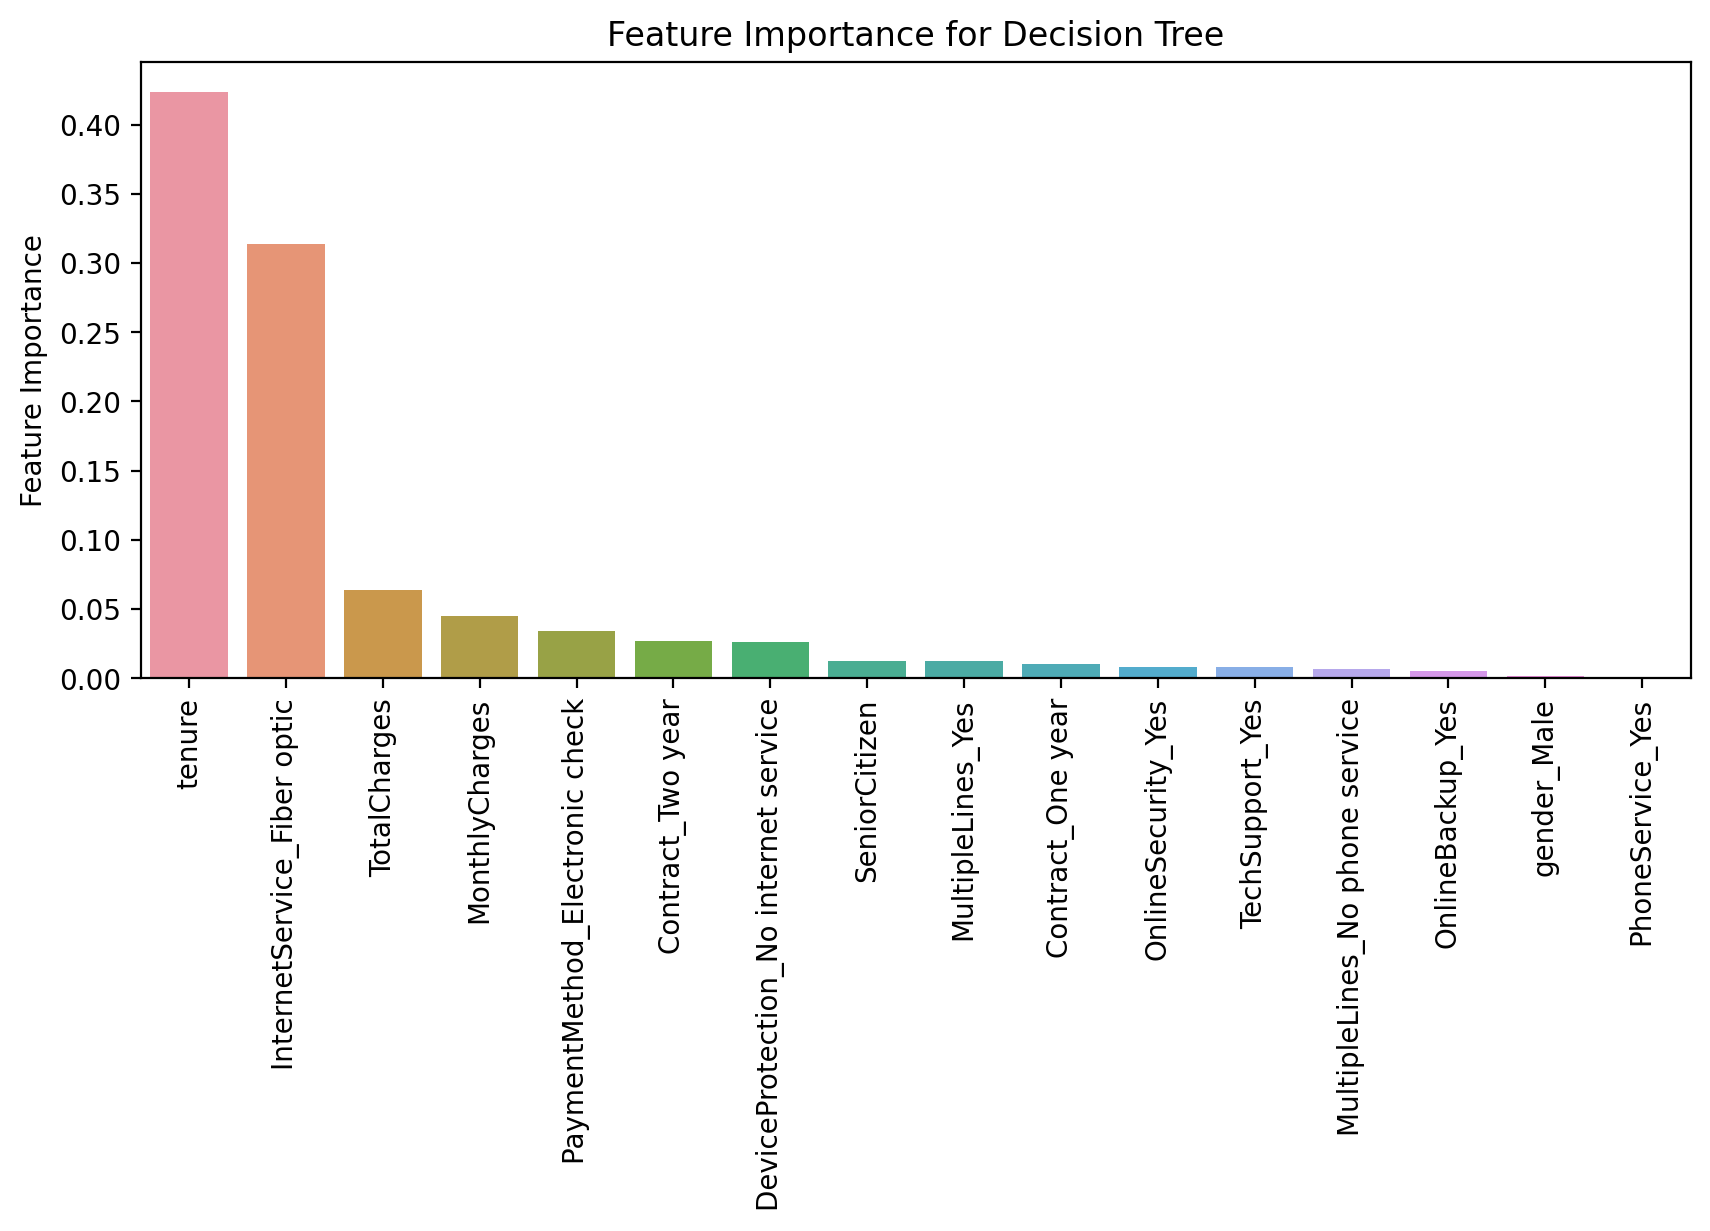

In [ ]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(data=imp_features,x=imp_features.index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title('Feature Importance for Decision Tree');

## This graph tells us how we should also look into the internet service column to further identify how it affected the churn rate and what to do next.

In [ ]:
from sklearn.tree import plot_tree

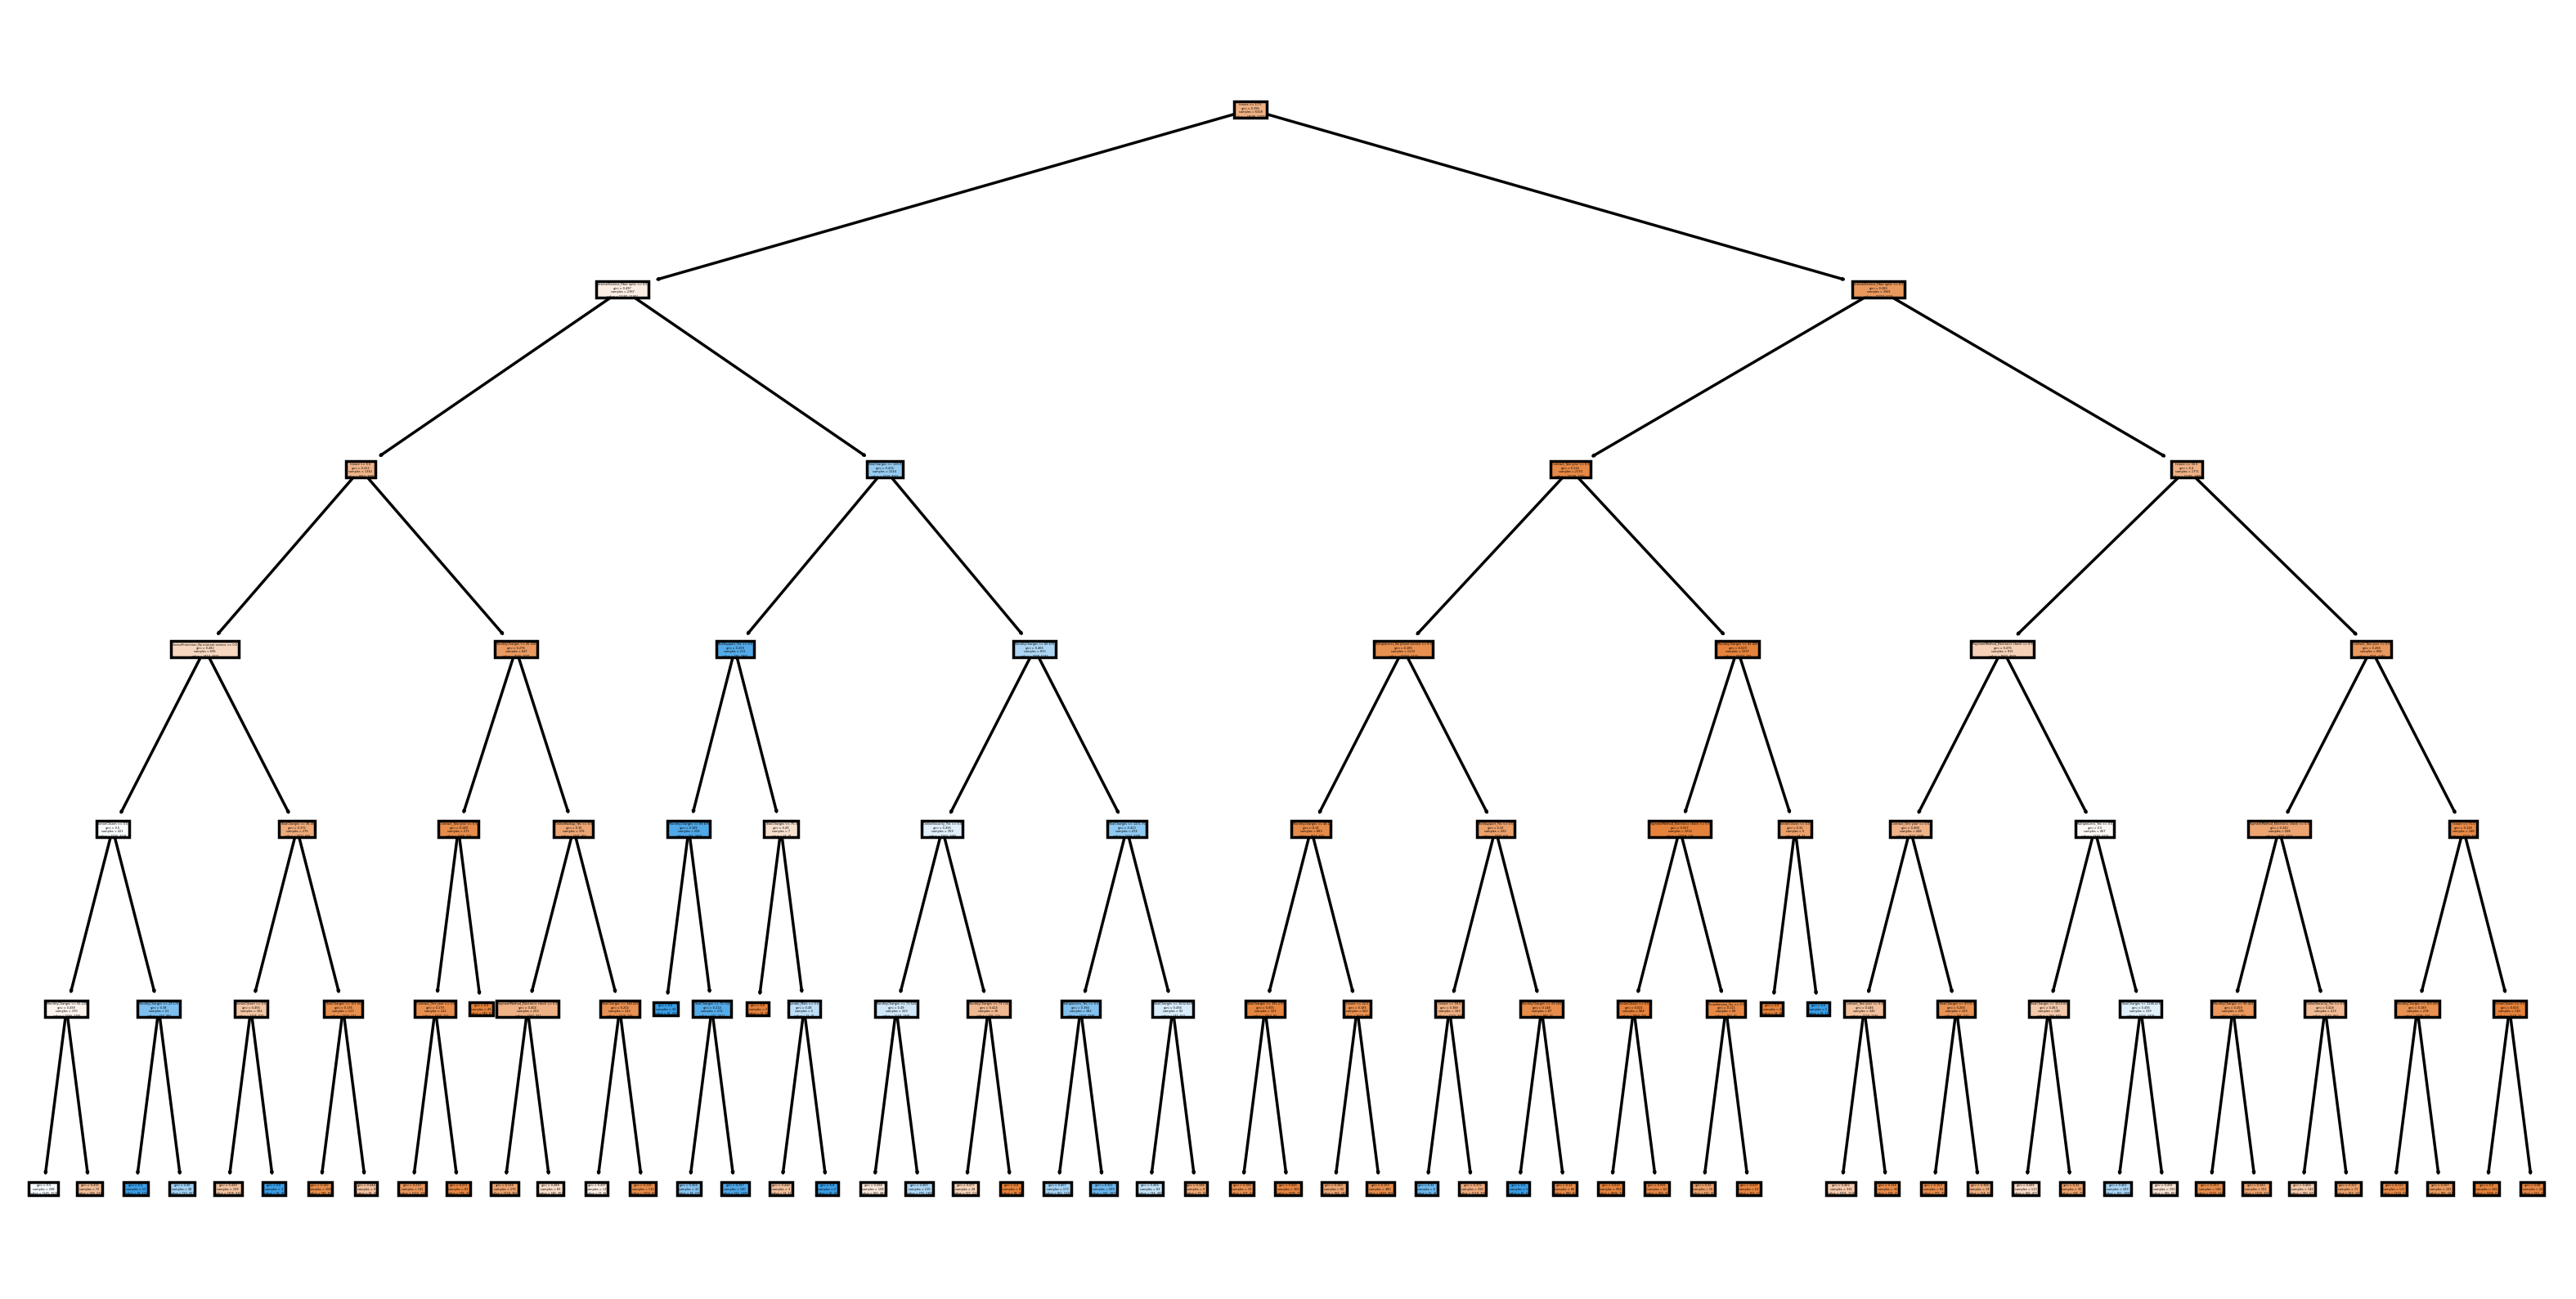

In [ ]:
plt.figure(figsize=(16,8),dpi=250)
plot_tree(model,filled=True,feature_names=X.columns);

***
# RANDOM FOREST:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(max_depth=6)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6)

In [ ]:
rf_preds = rf.predict(X_test)

In [ ]:
print(classification_report(y_test,rf_preds))

              precision    recall  f1-score   support

          No       0.86      0.92      0.89       557
         Yes       0.60      0.45      0.51       147

    accuracy                           0.82       704
   macro avg       0.73      0.68      0.70       704
weighted avg       0.81      0.82      0.81       704



### The model with default parameters is performing even worse than the decision tree! So now we will add some custom parameters.

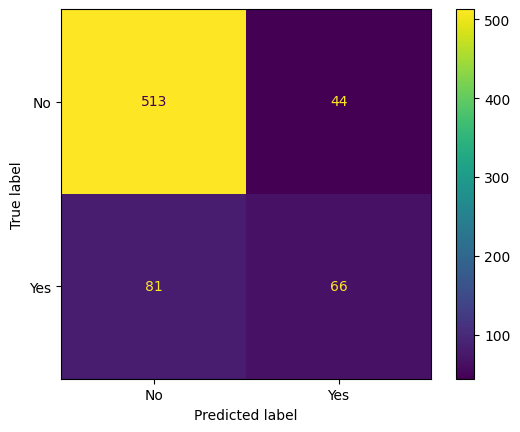

In [ ]:
cm = confusion_matrix(y_test, rf_preds, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()

plt.show()

## UNDERSTANDING THE CONFUSION MATRIX:
- **We improved the overall performance of the model, BUT what we really want did NOT get fulfilled as the RECALL DECREASED AND THE NO. OF FALSE NEGATIVES INCREASED FROM 75 TO 80.**
- **So now we know that if we still want to go ahead with this algorithm, we should perform a GridSearch with VARIOUS parameters and implement the best parameters to the model.**

***

# BOOSTED TREES:
### WE WILL USE ADABOOST AND GRADIENT BOOSTING:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
ada_model = AdaBoostClassifier()

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100)

In [ ]:
ada_model.fit(X_train,y_train)
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
ada_preds = ada_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

In [ ]:
print(classification_report(y_test,ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



In [ ]:
print(classification_report(y_test,gb_preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



## We can see improvements in both models' performances as compared to the single decision tree and the random forest tree.
- ### But we see how ADABOOST model performs better when we see their recalls and f1-scores.

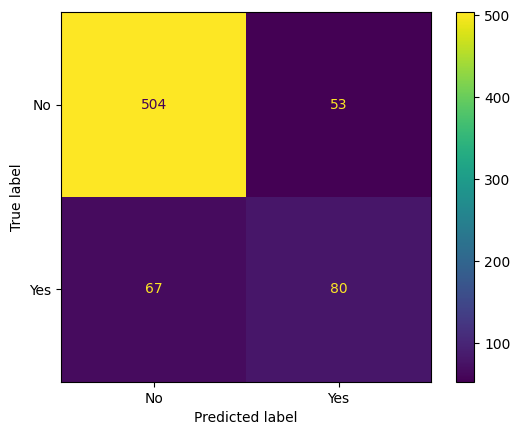

In [ ]:
cm = confusion_matrix(y_test, ada_preds, labels=ada_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=ada_model.classes_)
disp.plot()

plt.show()

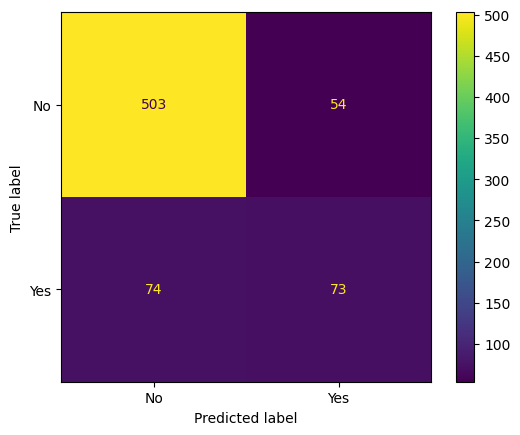

In [ ]:
cm = confusion_matrix(y_test, gb_preds, labels=gb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gb_model.classes_)
disp.plot()

plt.show()

## Conclusion : We see how adaboost model performs better as it decreases the no. of false negatives whereas the gradient boost model doesn't do much.
## Now we will go back up and play around with adaboost model's parameters to see if it can perform better;after increasing the no. of estimators, we see a slight increase in performance even though its mostly same,,, so we should perform a GridSearch on it to go ahead.
***